<a href="https://colab.research.google.com/github/ferbator/data-engineering/blob/main/M33071_%D0%9A%D0%B0%D1%80%D0%B5%D0%BF%D0%B8%D0%BD_%22lab3_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
_, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
X_train = np.append(X_train, np.ones((50, 1)), axis=1)

In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w, b = map(float, np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train))
w, b

(9.900819621692285, -7.949401064339642)

In [ ]:
X_test = np.append(X_test, np.ones((50, 1)), axis=1)

In [ ]:
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred1 = model.predict(X_test)

In [ ]:
pred2 = []
for test in X_test:
  pred2.append(test[0]*w + test[1]*b)

In [ ]:
mean_absolute_error(pred2, y_test), mean_squared_error(pred2, y_test)

(6.984461811336313, 85.99794775919136)

In [ ]:
mean_absolute_error(pred1, y_test), mean_squared_error(pred1, y_test)

(6.984461811336311, 85.99794775919136)

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будем брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['x_train'], data['y_train'], random_state=10)

In [ ]:
X_train = np.append(np.vstack(X_train), np.ones((len(X_train), 1)), axis=1)

In [ ]:
w, b = map(float, np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train))
w, b

(-0.2880375771643324, 1.9483005154637967)

In [ ]:
X_test = np.append(np.vstack(X_test), np.ones((len(X_test), 1)), axis=1)

In [ ]:
pred3 = []
for test in X_test:
  pred3.append(test[0]*w + test[1]*b)

In [ ]:
mean_absolute_error(pred3, y_test), mean_squared_error(pred3, y_test)

(0.44414126180278457, 0.2846654041813885)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
data = generate_wave_set(1000, 250)

In [ ]:
def pred_weight(n):
  pred = []
  poly = PolynomialFeatures(n)
  X_train, X_test, y_train, y_test = train_test_split(data['x_train'], data['y_train'], random_state=10)
  X_train = poly.fit_transform(np.vstack(X_train))
  X_test = poly.fit_transform(np.vstack(X_test))
  weight = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

  for test in X_test:
    pred.append(test @ weight)
  return pred, weight, X_train, X_test, y_train, y_test

In [ ]:
pred4 = []
pred4, weight, X_train, X_test, y_train, y_test = pred_weight(3)

In [ ]:
mean_absolute_error(pred4, y_test), mean_squared_error(pred4, y_test)

(0.25990445790979716, 0.09945879001272062)

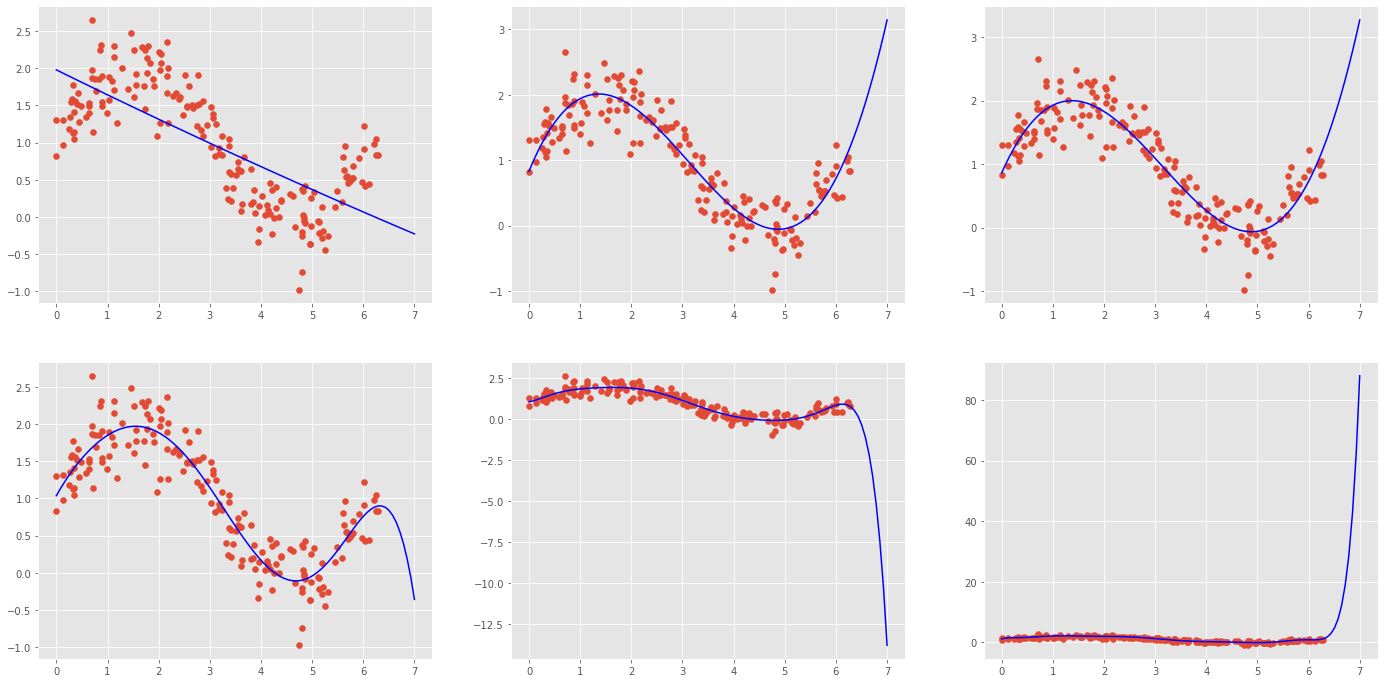

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
for i, n in enumerate([2, 3, 4, 7, 9, 11]):
  _, weight, X_train, X_test, y_train, y_test= pred_weight(n)
  axes[i//3][i%3].scatter(X_train[:, 1], y_train)
  x = np.linspace(0, 7, 100)
  axes[i//3][i%3].plot(x, sum([weight[i] * x**i for i in range(len(weight))]), color = 'blue')

Полином какой степени подходит больше других? Почему?

Лучшая степень для полинома = 3, потому что разброс точек имеет два изгиба

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
house_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Задание 3.4

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = pd.DataFrame(house_data['target'])

In [ ]:
X = np.append(X, np.ones((len(X), 1)), axis=1)

Добавляю стандартизацию перед оценкой важности

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#StandardScaler - не работает

#scaler= StandardScaler().fit(X)
#X = scaler.transform(X)

X = (X - X.mean())/X.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
weight = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
top7 = np.abs(weight).sort_values(by=0, ascending=False).head(7).index

In [ ]:
X_7 = X[:, top7]
top7

Int64Index([13, 12, 7, 8, 5, 9, 10], dtype='int64')

In [ ]:
X_7_train, X_7_test, y_7_train, y_7_test = train_test_split(X_7, y, random_state=10)

In [ ]:
weight7 = np.linalg.inv(X_7_train.T @ X_7_train) @ (X_7_train.T @ y_7_train)

In [ ]:
pred6 = []
for i in range(X_7_test.shape[0]):
    pred6.append(X_7_test[i] @ weight7)

In [ ]:
mean_absolute_error(pred6, y_7_test), mean_squared_error(pred6, y_7_test)

(3.9436519265061403, 32.5785646492713)

In [ ]:
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
pred5 = []
for i in range(X_test.shape[0]):
    pred5.append(X_test[i] @ weight)

In [ ]:
mean_absolute_error(pred5, y_test), mean_squared_error(pred5, y_test)

(3.857300907995511, 32.44253669600674)